In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
item = 'HousePrices' 
package = 'AER'

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [190]:
df.shape

(546, 12)

In [192]:
df.isna().sum() ## наличие пропусков

price         0
lotsize       0
bedrooms      0
bathrooms     0
stories       0
driveway      0
recreation    0
fullbase      0
gasheat       0
aircon        0
garage        0
prefer        0
dtype: int64

In [194]:
df[df.duplicated()] ## наличие дубликатов строк

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
534,82000,5000,3,1,3,yes,no,no,no,yes,0,no


In [196]:
df = df.drop_duplicates()

In [146]:
df.shape ## результат очистки данных

(545, 12)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 0 to 545
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       545 non-null    int64 
 1   lotsize     545 non-null    int64 
 2   bedrooms    545 non-null    int64 
 3   bathrooms   545 non-null    int64 
 4   stories     545 non-null    int64 
 5   driveway    545 non-null    object
 6   recreation  545 non-null    object
 7   fullbase    545 non-null    object
 8   gasheat     545 non-null    object
 9   aircon      545 non-null    object
 10  garage      545 non-null    int64 
 11  prefer      0 non-null      object
dtypes: int64(6), object(6)
memory usage: 55.4+ KB


Проверили и очистили данные от пропусков и дубликатов. Данный датасет имел одну строку дублей, пропусков не обнаружено. Также установленно, что необходимости конвертации признаков нет.

1. Проведем анализ взаимосвязи двух категориальных переменных. Выбранный датасет описывает цены на дома, проданные в городе Виндзор, Канада, в июле, августе и сентябре 1987 года. Определим, есть ли статистически значимая зависимость между подъездными дорогами (driveway) и расположением дома в предпочтительном районе города (prefer). Н0 - нет статистической связи между двумя категориальными переменными.

In [172]:
way = {0 : 'YES',  1 : 'NO'}
district = {0 : 'YES',  1 : 'NO'}
df['driveway'] = df['driveway'].map(way).fillna('more')
df['prefer'] = df['prefer'].map(district)

In [198]:
df_heat = pd.crosstab(df['prefer'], df['driveway'])
df_heat

driveway,no,yes
prefer,,
no,75,342
yes,2,126


In [200]:
stats.chi2_contingency(df_heat)

Chi2ContingencyResult(statistic=20.44030075548806, pvalue=6.1520545272850425e-06, dof=1, expected_freq=array([[ 58.91559633, 358.08440367],
       [ 18.08440367, 109.91559633]]))

P- значение существенно ниже 5%, что дает нам возможность судить о том, что данные противоречат нулевой гипетезе о том, что между подъездными дорогами и расположением дома в предпочтительном районе города существует взаимосвязь, следовательно мы можем ее отвергнуть. Соответственно, можно сделать вывод, что между взятыми категориальными переменными есть значимая зависимость. Проведенный анализ дает нам основание судить о том, что расположение дома в предпочтительном районе города напрямую связан с наличием подъездных путей к нему. 

2. Проведем анализ взаимосвязи между двумя числовыми переменными. Определим, есть ли статистически значимая зависимость между ценой на дом (price) и количеством комнат в доме (bedrooms). 

In [39]:
df['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
1      2
6      2
Name: count, dtype: int64

In [37]:
df['price'].corr(df['bedrooms']) ## корреляция между ценой и количеством комнат в доме

0.3664940257738682

Положительная корреляция, говорит нам о положительной взаимосвязи между переменными,т.е. чем больше комнат, тем больше цена.

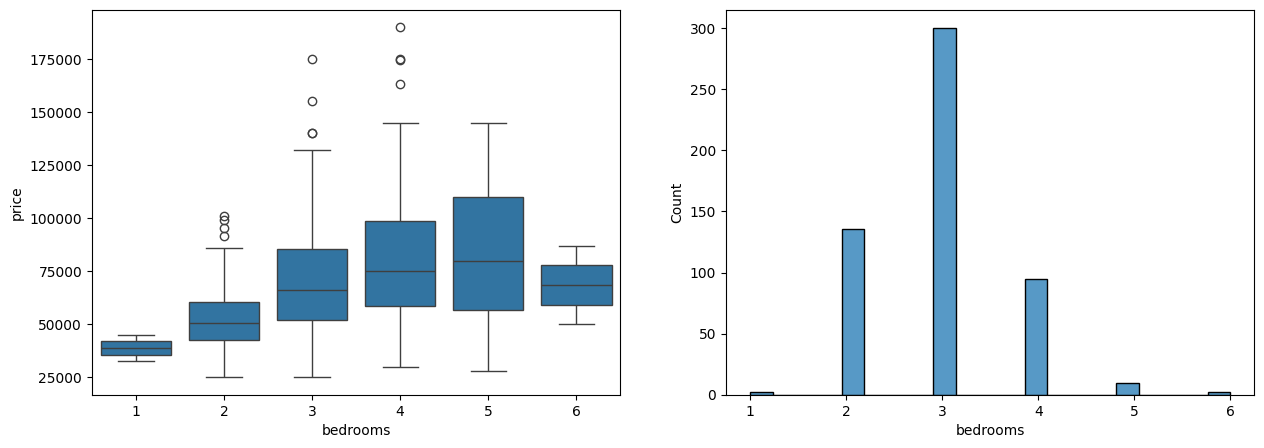

In [43]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(data = df, x = 'bedrooms', y = 'price', ax = ax[0])
sns.histplot(data = df, x = 'bedrooms', ax = ax[1])
plt.show()

На основе сравнения бокс-плотов можно предположить, что между группами домов, распределенных по количеству комнат существует разница в цене.
1к-ые дома стоят соответственно меньше всего, 2к-ые, 3к-ые, 4к-ые имеют выбросы и не характерно высокие цены, самый большой "разброс" в цене и самую высокую стоимость (без учета выбросов 2,3,4 -х ) имеют 5к-ые домов, от 1-5 к мы наблюдаем характерный рост в цене, однако 6к-ые напротив имеют меньшую стоимость по отношению к 5-к домам. 

Распределение переменной "количество комнат" далеко визуально от нормального. За указанный период больше всего продано 3-к домов.

In [97]:
stats.shapiro(df['bedrooms'])

ShapiroResult(statistic=0.8292241859985027, pvalue=1.1082903223666757e-23)

Нулевая гипотеза теста - данные распределены нормально

р-значение меньше 5% => данные противоречат нулевой гипотезе

Нулевая гипотеза отвергается, "количество комнат" распределены не по нормальному закону 

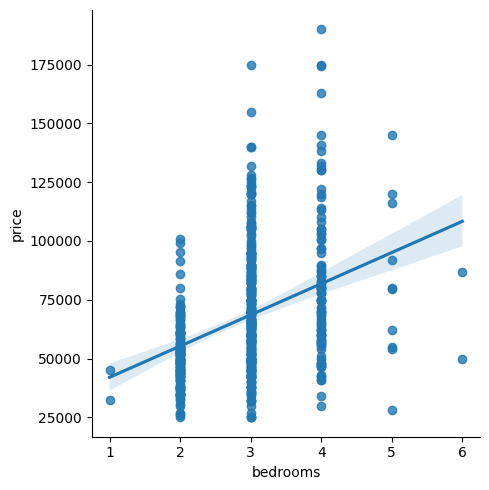

In [61]:
sns.lmplot(data = df, x = 'bedrooms', y = 'price')
plt.show()

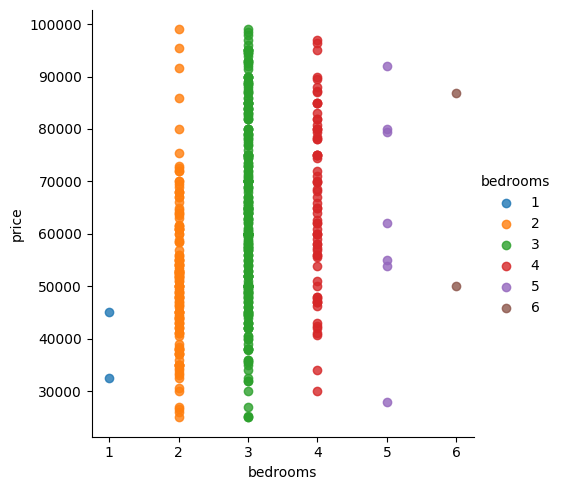

In [80]:
sns.lmplot(
    data = df[(df['bedrooms']<=6)&(df['bedrooms']>0)&(df['price']<100000)], 
    x = 'bedrooms', 
    y = 'price', 
    hue = 'bedrooms'
)
plt.show()

In [72]:
df1k = df.loc[df['bedrooms']==1, 'price']
df2k = df.loc[df['bedrooms']==2, 'price']
df3k = df.loc[df['bedrooms']==3, 'price']
df4k = df.loc[df['bedrooms']==4, 'price']
df5k = df.loc[df['bedrooms']==5, 'price']
df6k = df.loc[df['bedrooms']==6, 'price']

alpha = 0.95

mean_1k = df1k.mean()
var_1k = df1k.var()
n_1k = df1k.count()

ci_1k = stats.norm.interval(confidence = alpha, loc = mean_1k, scale = np.sqrt(var_1k/n_1k))
print(f'95% доверительный интервал для средней цены 1к домов от {ci_1k[0].round(2)} до {ci_1k[1].round(2)} долларов')

mean_2k = df2k.mean()
var_2k = df2k.var()
n_2k = df2k.count()
    
ci_2k = stats.norm.interval(confidence = alpha, loc = mean_2k, scale = np.sqrt(var_2k/n_2k))
print(f'95% доверительный интервал для средней цены 2к домов от {ci_2k[0].round(2)} до {ci_2k[1].round(2)} долларов')

mean_3k = df3k.mean()
var_3k = df3k.var()
n_3k = df3k.count()
        
ci_3k = stats.norm.interval(confidence = alpha, loc = mean_3k, scale = np.sqrt(var_3k/n_3k))
print(f'95% доверительный интервал для средней цены 3к домов от {ci_3k[0].round(2)} до {ci_3k[1].round(2)} долларов')

mean_4k = df4k.mean()
var_4k = df4k.var()
n_4k = df4k.count()

ci_4k = stats.norm.interval(confidence = alpha, loc = mean_4k, scale = np.sqrt(var_4k/n_4k))
print(f'95% доверительный интервал для средней цены 4к домов от {ci_4k[0].round(2)} до {ci_4k[1].round(2)} долларов')

mean_5k = df5k.mean()
var_5k = df5k.var()
n_5k = df5k.count()

ci_5k = stats.norm.interval(confidence = alpha, loc = mean_5k, scale = np.sqrt(var_5k/n_5k))
print(f'95% доверительный интервал для средней цены 5к домов от {ci_5k[0].round(2)} до {ci_5k[1].round(2)} долларов')

mean_6k = df6k.mean()
var_6k = df6k.var()
n_6k = df6k.count()
            
ci_6k = stats.norm.interval(confidence = alpha, loc = mean_6k, scale = np.sqrt(var_6k/n_6k))
print(f'95% доверительный интервал для средней цены 6к домов от {ci_6k[0].round(2)} до {ci_6k[1].round(2)} долларов')

95% доверительный интервал для средней цены 1к домов от 26500.23 до 50999.77 долларов
95% доверительный интервал для средней цены 2к домов от 49475.43 до 54296.63 долларов
95% доверительный интервал для средней цены 3к домов от 67955.01 до 73604.94 долларов
95% доверительный интервал для средней цены 4к домов от 75224.27 до 88483.1 долларов
95% доверительный интервал для средней цены 5к домов от 60983.96 до 105296.04 долларов
95% доверительный интервал для средней цены 6к домов от 32288.66 до 104611.34 долларов


In [90]:
df1k_price = df.loc[(df['bedrooms']==1)&(df['price']<100000), 'price']
df2k_price = df.loc[(df['bedrooms']==2)&(df['price']<100000), 'price']
df3k_price = df.loc[(df['bedrooms']==3)&(df['price']<100000), 'price']
df4k_price = df.loc[(df['bedrooms']==4)&(df['price']<100000), 'price']
df5k_price = df.loc[(df['bedrooms']==5)&(df['price']<100000), 'price']
df6k_price = df.loc[(df['bedrooms']==6)&(df['price']<100000), 'price']

In [92]:
print('Средняя цена 1к дома составляет', df1k_price.mean().round(2))
print('Средняя цена 2к дома составляет', df2k_price.mean().round(2))
print('Средняя цена 3к дома составляет', df3k_price.mean().round(2))
print('Средняя цена 4к дома составляет', df4k_price.mean().round(2))
print('Средняя цена 5к дома составляет', df5k_price.mean().round(2))
print('Средняя цена 6к дома составляет', df6k_price.mean().round(2))

Средняя цена 1к дома составляет 38750.0
Средняя цена 2к дома составляет 51522.22
Средняя цена 3к дома составляет 64062.74
Средняя цена 4к дома составляет 66209.86
Средняя цена 5к дома составляет 64342.86
Средняя цена 6к дома составляет 68450.0


In [95]:
stats.ttest_ind(df3k_price, df5k_price, alternative = 'two-sided')

TtestResult(statistic=-0.04124037030904686, pvalue=0.9671349768522174, df=268.0)

Нулевая гипотеза - средняя цена на 3-к и 5-к дома равны.
p-значение более 5%, то есть нулевую гипотезу о том, что средняя цена на 3-к и 5-к дома равны, отвергнуть нельзя
Средние цены 3к и 5к дома равны.

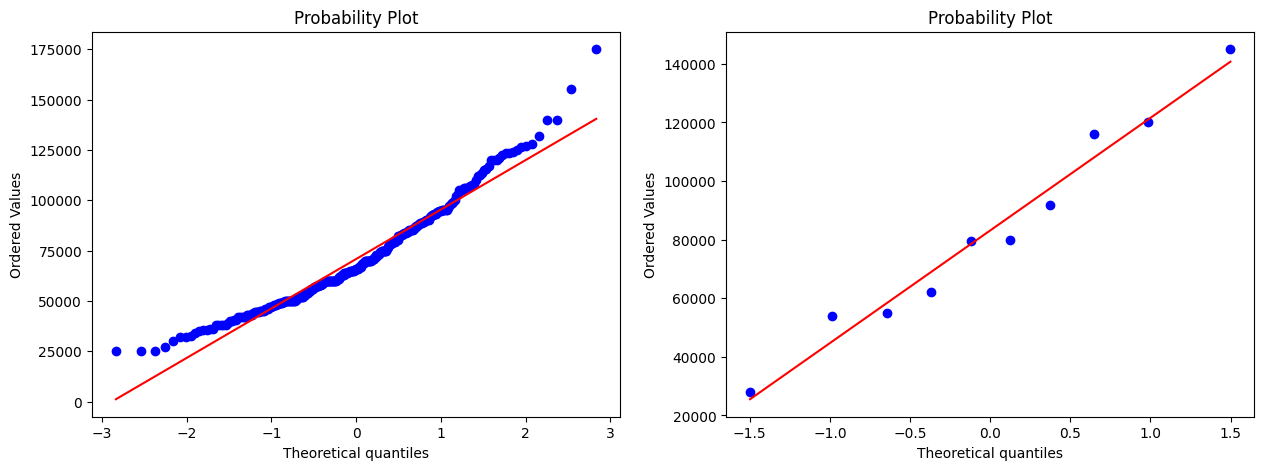

In [101]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.title('QQ-plot для 3к и 5к домов')
stats.probplot(df3k, dist="norm", plot = ax[0])
stats.probplot(df5k, dist="norm", plot = ax[1])
plt.show()

In [108]:
df3k_price = df.loc[(df['bedrooms']==3)&(df['price']<125000), 'price']
df5k_price = df.loc[(df['bedrooms']==5)&(df['price']<125000), 'price']

In [110]:
stats.mannwhitneyu(df3k_price, df5k_price, alternative = 'two-sided')

MannwhitneyuResult(statistic=1098.5, pvalue=0.4114385176108821)

Поскольку р-значение меньше 5%, нулевая гипотеза теста о том, что формы распределения цен на 3к дома и 5к дома совпадают (в т.ч., что совпадают их медианы), отвергается. Медианные цены на 3к и 5к квартиры не равны.

После проведенного выше анализа можно сказать, что статистическая зависимость между стоимостью домов и количеством комнат в них, существует. Несмотря на то, что гипотеза о равенстве средней цены между 3-к и 5-к домами равна, она может достигаться за счет количества проданных 3-к домов (300 ед), в то время как 5-х продано 10 ед, что также подтверждается медианным значением. Зависимость количества комнат и цены естественно должна существовать, ведь чем больше комнат, тем больше площадь дома и соответственно стоимость на его постройку возрастает, поэтому рост цены логичен, однако есть характеристики, которые не показаны в нашем датасете, такие как например состояние жилого помещение, что может удишевлять его стоимость, возможно по этой причине стоимость 6 комнатных домов не настолько велика по сравнению с другими.

In [112]:
 df.aircon

0       no
1       no
2       no
3       no
4       no
      ... 
541    yes
542    yes
543    yes
544    yes
545    yes
Name: aircon, Length: 545, dtype: object

In [116]:
df['aircon'].value_counts()

aircon
no     373
yes    172
Name: count, dtype: int64

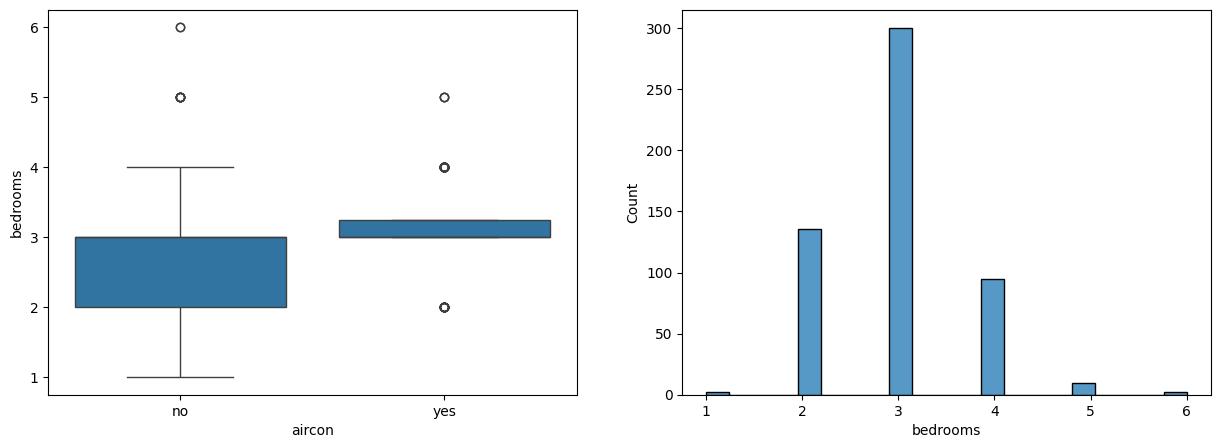

In [144]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(data = df, x = 'aircon', y = 'bedrooms', ax = ax[0])
sns.histplot(data = df, x = 'bedrooms', ax = ax[1])
plt.show()

На основе сравнения бокс-плотов можно предположить, что между двумя категориальными переменными есть разница с точки зрения наличия системы кондиционирования в домах. Визуально можно увидеть, что наличие системы кондиционированияимеется в 2к и 3к представлено в большей степени, чем в остальных.
Распределение переменной bedrooms  не нормальное.

In [152]:
stats.shapiro(df['bedrooms'])

ShapiroResult(statistic=0.8292241859985027, pvalue=1.1082903223666757e-23)

Нулевая гипотеза теста - данные распределены нормально

р-значение меньше 5% => данные противоречат нулевой гипотезе

Нулевая гипотеза отвергается, о нармальном распределении переменной  bedrooms не нормально 

In [154]:
stats.kruskal(no,yes)

KruskalResult(statistic=17.926397750684355, pvalue=2.296141587276544e-05)

Нулевая гипотеза теста - медианное значение bedrooms между двумя категориальными переменными aircon не отличается

р-значение меньше 5% => данные противоречат нулевой гипотезе

Нулевая гипотеза отвергается, наличие системы кондиционирования в домах отличается.

Итак, проведя анализ по заданному датасету, можно сделать следующие выводы: стоимость домов возрастает от количества комнат в них, наличие подъездных путей к домовладениям зависит от расположения в предпочтительном районе города, система кондиционирования отличается в домах и предпочтительно установлена в 2к и 3к дома, что также сказывается на стоимости жилья. Большим спросом пользуются 3-к дома за 3 месяца их продано 300 ед., средняя стоимость которых составила 64062.74 долларов, меньшим - 1к (средняя стоимость 38750.0 долларов) и 6к (средняя стоимость 68450.0) дома их продано по 2 ед. Данный анализ можно использовать строительным компаниям, для корректировки застройки жилых массивов с учетом потребности рынка.